üìå Trabajo Final de Diplomatura en Inteligencia Artificial - Grupo 6 - Cohorte  2024

# Sistema para la clasificaci√≥n correcta de residuos.


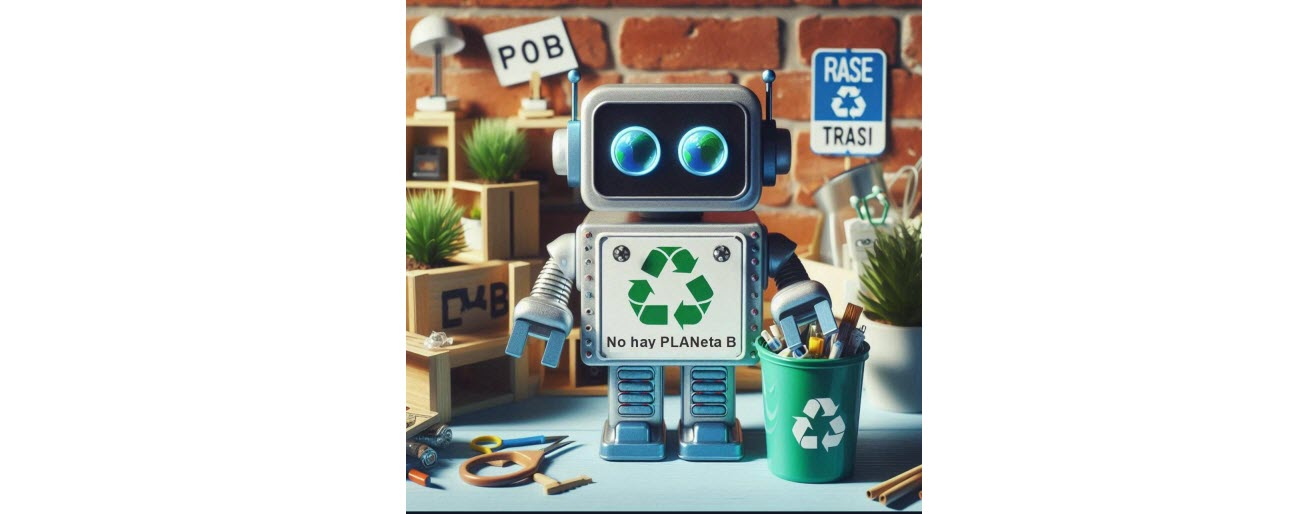

### Integrantes:  
    Valentina Botta  
    Gustavo Lucarella   
    Mauricio Magistocchi   
    Edgardo Eliseo Cornelio  


 **üü¢ "En este cuaderno, clasificaremos los desechos (trash) o no, utilizando una Red Neuronal Convolucional (CNN).".**


El desperdicio es un problema global significativo. Se est√°n generando vol√∫menes crecientes de residuos a medida que la poblaci√≥n mundial y los est√°ndares de vida aumentan. Las personas est√°n cada vez m√°s preocupadas por la producci√≥n de residuos y su efecto, y buscan formas de abordar el problema.

El reciclaje es el proceso de convertir materiales de desecho en nuevos materiales y objetos. La recuperaci√≥n de energ√≠a de los materiales de desecho a menudo se incluye en este concepto. La reciclabilidad de un material depende de su capacidad para recuperar las propiedades que ten√≠a en su estado original. Es una alternativa a la eliminaci√≥n de residuos "convencional" que puede ahorrar materiales y ayudar a reducir las emisiones de gases de efecto invernadero. El reciclaje puede prevenir el desperdicio de materiales potencialmente √∫tiles y reducir el consumo de materias primas frescas, lo que a su vez disminuye: el uso de energ√≠a, la contaminaci√≥n del aire (por incineraci√≥n) y la contaminaci√≥n del agua (por vertederos).


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import cv2

import warnings
warnings.filterwarnings('ignore')
import os
for dirname, _, _ in os.walk('/MyDrive/kaggle/input'):
        print(dirname)

In [3]:
train_path = "/mnt/c/Users/edgardo/git-edgardo/Austral/TF-Diplo/DataSet/Dataset_splits/train"
test_path = "/mnt/c/Users/edgardo/git-edgardo/Austral/TF-Diplo/DataSet/Dataset_splits/test"

In [4]:
contenido = os.listdir(train_path)
print(contenido)

['cardboard', 'compost', 'glass', 'metal', 'paper', 'plastic', 'trash']


## Importamos librerias

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.utils import plot_model
from glob import glob
# mejoras
from tensorflow.keras.regularizers import l2
#tf.get_logger().setLevel('ERROR') # solo mostramos mensajes de tipo "ERROR"

2024-10-20 13:20:16.785732: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-20 13:20:16.855829: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-20 13:20:16.876691: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-20 13:20:17.001974: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-20 13:20:18.235943: W tensorflow/compiler/tf2

##  Carga y Preprocesamiento de Im√°genes desde Directorios

Leemos im√°genes de una ruta de directorio, convertirmos a formato RGB, almacenamos las im√°genes en un array y tambi√©n capturamos sus etiquetas. Al final, toda esta informaci√≥n (im√°genes y etiquetas) se organiza en un DataFrame de pandas para su uso posterior en un modelo de aprendizaje autom√°tico

In [6]:
x_data = []
y_data = []

for category in glob(train_path+'/*'):                              # Itera sobre las carpetas de cada categor√≠a
    for file in tqdm(glob(category+'/*')):                          # Itera sobre los archivos de cada categor√≠a, con tqdm muestro barra de avance
        img_array=cv2.imread(file)                                  # Carga la imagen
        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)      # Convierte la imagen de BGR a RGB
        x_data.append(img_array)                                    # Agrega la imagen a la lista x_data
        y_data.append(category.split("/")[-1])                      # Extrae y agrega la etiqueta a y_data

data=pd.DataFrame({'image': x_data,'label': y_data})

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1036/1036 [00:13<00:00, 77.14it/s]


Vemos la estructura del dataframe data como (n filas, n columnas)

In [7]:
data.shape

(7117, 2)

Importamos Counter para obtener la cantidad (frecuencia) de imagenes por categoria

In [11]:
from collections import Counter
Counter(y_data)

Counter({'compost': 1093,
         'glass': 1084,
         'paper': 1084,
         'trash': 1036,
         'cardboard': 1013,
         'plastic': 969,
         'metal': 838})

Mostramos mediante un grafico de torta el porcentaje de distribucion por categoria de las imagenes

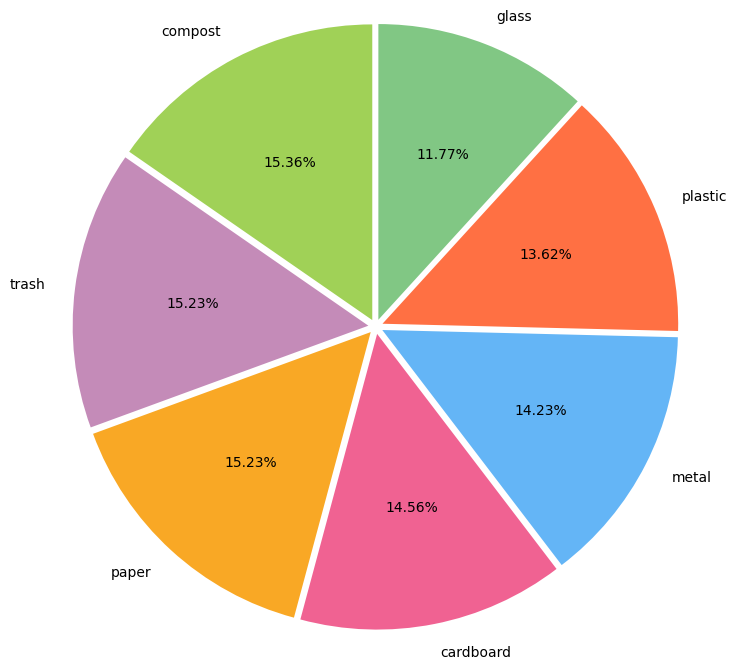

In [9]:
colors = ['#a0d157', '#c48bb8', '#f9a825', '#f06292', '#64b5f6', '#ff7043', '#81c784']
explode = [0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05]  # A√±adir un valor para cada categor√≠a

plt.pie(data.label.value_counts(), startangle=90, explode=explode, autopct='%0.2f%%',
        labels=['compost', 'trash' , 'paper' , 'cardboard' , 'metal', 'plastic', 'glass' ], colors=colors, radius=2)

plt.show()


Mostramos nueve imagenes del dataset de manera aleatoria

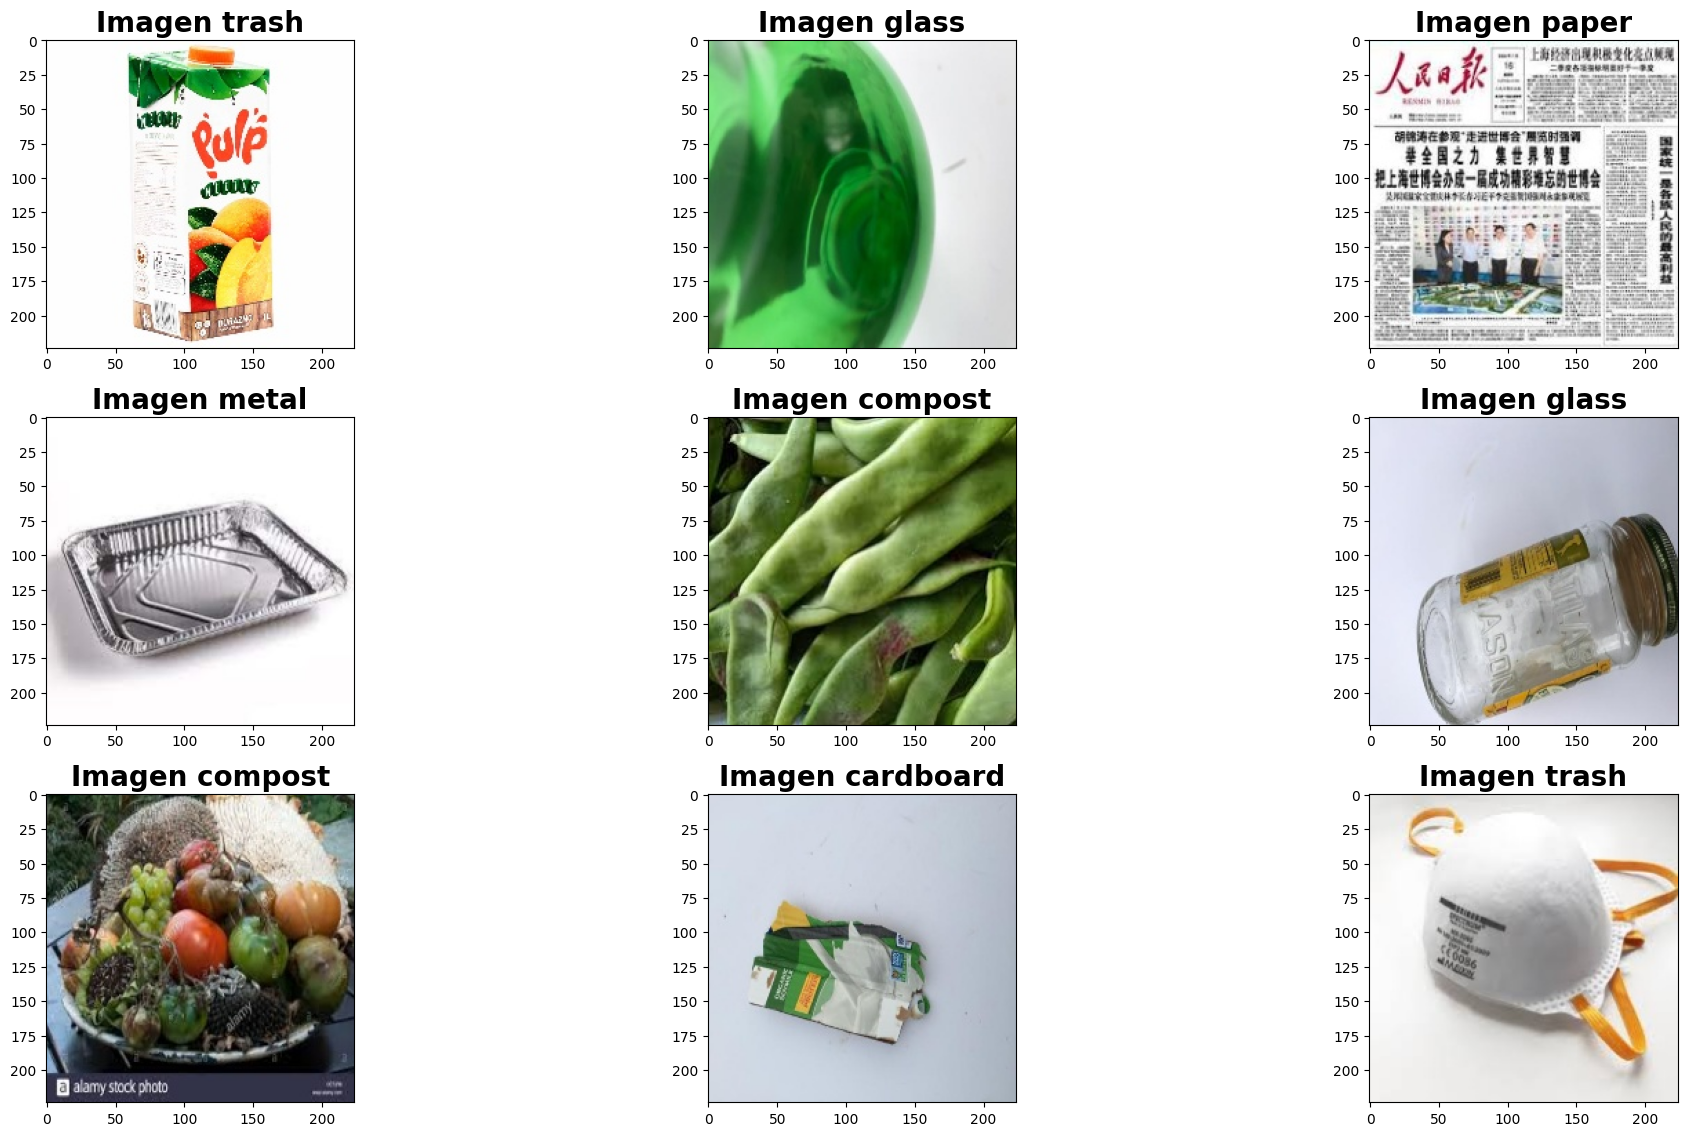

In [9]:
plt.figure(figsize=(20,15))
for i in range(9):
    plt.subplot(4,3,(i%12)+1)
    index=np.random.randint(7000)
    plt.title('Imagen {0}'.format(data.label[index]),fontdict={'size':20,'weight':'bold'})
    plt.imshow(data.image[index])
    plt.tight_layout()

Contamos el n√∫mero de categorias de nuestro Dataset

In [10]:
className = glob(train_path + '/*' )
numberOfClass = len(className)
print("N√∫mero de clases : ",numberOfClass)

N√∫mero de clases :  7


## Construcci√≥n de un Modelo de Red Neuronal Convolucional (CNN) para Clasificaci√≥n de Im√°genes

Implementamos un modelo de red neuronal convolucional (CNN) utilizando la API de Keras dentro de TensorFlow, para la clasificaci√≥n de im√°genes. Comenzamos creando un modelo secuencial y a√±adimos m√∫ltiples capas convolucionales con activaciones ReLU, seguidas de capas de max pooling para reducir la dimensionalidad y prevenir el sobreajuste. Las salidas de las capas convolucionales las aplanamos antes de pasar a las capas densas, donde se aplica regularizaci√≥n L2 y Dropout para mejorar la generalizaci√≥n. Finalmente, definimos una capa de salida con activaci√≥n softmax para manejar m√∫ltiples clases. El modelo lo compilamos utilizando la funci√≥n de p√©rdida de entrop√≠a cruzada categ√≥rica y el optimizador Adam, estableciendo la precisi√≥n como m√©trica para evaluar su rendimiento.

In [11]:
# Creamos el modelo de tipo secuencial
model = Sequential()


# Primer capa convolucional

# Con "Conv2D(32,(3,3)" indicamos que se aplique una capa convolucional con 32 filtros (tambi√©n llamados kernels) de tama√±o 3x3.
# Con "Input_shape" indicamos que las im√°genes de entrada tienen un tama√±o de 224x224 p√≠xeles y 3 canales (una imagen RGB con 3 canales de color: rojo, verde y azul).
model.add(Conv2D(32,(3,3),input_shape = (224,224,3)))

# Aplica la funci√≥n de activaci√≥n ReLU (Rectified Linear Unit), que introduce no linealidad en el modelo.
# ReLU convierte los valores negativos en 0, manteniendo los positivos tal cual.
model.add(Activation("relu"))

# Aplica una operaci√≥n de max pooling, que reduce las dimensiones de las im√°genes para disminuir la cantidad de par√°metros y evitar el sobreajuste.
model.add(MaxPooling2D())


# Segunda capa convolucional

# Esta capa se aplica 64 filtros de tama√±o 3x3. No se necesita especificar el input_shape porque la entrada a esta capa es la salida de la capa anterior.
model.add(Conv2D(64,(3,3)))

# Funcion de activacion igual a la capa anterior.
model.add(Activation("relu"))

# Igual que la capa anterior.
model.add(MaxPooling2D())


# Tercera capa convolucional

# Se aplica 128 filtros de tama√±o 3x3.
model.add(Conv2D(128,(3,3)))

model.add(Conv2D(64, (3, 3)))  # Aumentar de 32 a 64 filtros
model.add(Conv2D(128, (3, 3)))  # Aumentar de 64 a 128 filtros

#Igual a las capas anteriores
model.add(Activation("relu"))

#Igual a las capas anteriores
model.add(MaxPooling2D())


# Aplanado de los datos (Flatten)

# Esta capa convierte la salida 3D de las capas convolucionales (ancho, alto, profundidad) en una dimensi√≥n 1D.
# Esto es necesario para conectar las capas convolucionales con las capas completamente conectadas (densas) que vienen a continuaci√≥n.
model.add(Flatten())

# Primera capa completamente conectada (Dense)

# Agrega una capa densa completamente conectada con 256 neuronas.
#model.add(Dense(256))

#Aparte del Dropout, puedes a√±adir regularizaci√≥n L2 en las capas densas para reducir el riesgo de sobreajuste:
model.add(Dense(256, kernel_regularizer=l2(0.01)))  # A√±adir regularizaci√≥n L2


# Aplica la activaci√≥n ReLU para introducir no linealidad.
model.add(Activation("relu"))

# Aplica la t√©cnica de Dropout, que desactiva aleatoriamente el 50% de las neuronas durante el entrenamiento.
# Esto ayuda a prevenir el sobreajuste, forzando al modelo a generalizar mejor.
model.add(Dropout(0.5))

# Segunda capa completamente conectada (Dense)

# Similar a la capa anterior
model.add(Dense(64))
model.add(Activation("relu"))
model.add(Dropout(0.5))


# Capa de salida

# La √∫ltima capa densa tiene tantas neuronas como el n√∫mero de clases en el problema de clasificaci√≥n (numberOfClass).
# Cada neurona corresponde a una clase diferente.
model.add(Dense(numberOfClass)) # output

# Utiliza la activaci√≥n sigmoide, que es adecuada para problemas de clasificaci√≥n binaria o multiclase con una sola etiqueta.
# La activaci√≥n sigmoide convierte las salidas en valores entre 0 y 1.
model.add(Activation("softmax"))


# Compilaci√≥n del modelo
model.compile(loss = "categorical_crossentropy", # funci√≥n de p√©rdida es entrop√≠a cruzada binaria. Esto sugiere que el problema es de clasificaci√≥n binaria (dos clases).
              optimizer = "adam", # Utiliza el optimizador Adam para el ajuste autom√°tico de los par√°metros de entrenamiento.
              metrics = ["accuracy"])  # Se utiliza la m√©trica de precisi√≥n (accuracy) para evaluar el rendimiento del modelo durante el entrenamiento.

# Tama√±o de lote (batch size)
# Define el tama√±o del lote para el entrenamiento, es decir, el n√∫mero de muestras que el modelo procesar√° antes de actualizar los pesos.
# En este caso, el lote es de 256 muestras.
batch_size =64 # 64 # 128  # 256



I0000 00:00:1729256913.758452   26500 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-10-18 10:08:33.843677: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2343] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


 Representaci√≥n gr√°fica de la arquitectura del modelo (con las capas y sus conexiones).

In [13]:
#plot_model(model)

In [14]:
#from tensorflow.keras.utils import plot_model
#plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)


Creamos un objeto de la clase ImageDataGenerator de Keras, que se utilizara para generar lotes de im√°genes preprocesadas en tiempo real durante el entrenamiento de un modelo de deep learning. Este generador aplica transformaciones o modificaciones a las im√°genes de entrada, como el escalado, la normalizaci√≥n, rotaci√≥n, el desplazamiento, entre otras.
Utilizamos antes de entrenar el modelo para mejorar la eficacia y velocidad del entrenamiento.

 "rescale" escalamos los valores de los p√≠xeles de las im√°genes.
 Las im√°genes generalmente tienen valores de p√≠xel en el rango [0, 255] (dado que los p√≠xeles tienen valores RGB).
 Al establecer rescale=1./255, est√°s normalizando los valores de los p√≠xeles al rango [0, 1]. Esto se logra dividiendo cada valor de p√≠xel por 255.

In [12]:
train_datagen = ImageDataGenerator(rescale= 1./255)

In [13]:
test_datagen = ImageDataGenerator(rescale= 1./255)

Creamos un generador de im√°genes a partir de un conjunto de im√°genes almacenadas en carpetas, utilizando el m√©todo flow_from_directory() del objeto ImageDataGenerator (en este caso, train_datagen). El generador producir√° lotes de im√°genes que se pueden utilizar para entrenar el modelo de red neuronal convolucional (CNN).

In [14]:

train_generator = train_datagen.flow_from_directory(
        train_path,
        target_size= (224,224),
        batch_size = batch_size,
        color_mode= "rgb",
        class_mode= "categorical"
    #,
        #rotation_range=30, 
#width_shift_range=0.2,
#height_shift_range=0.2,
#shear_range=0.2,
#zoom_range=0.2,
#horizontal_flip=True
)

test_generator = test_datagen.flow_from_directory(
        test_path,
        target_size= (224,224),
        batch_size = batch_size,
        color_mode= "rgb",
        class_mode= "categorical"
)

Found 7110 images belonging to 7 classes.
Found 644 images belonging to 7 classes.


In [15]:
import tensorflow as tf

# Verifica las GPUs disponibles
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    print(f"GPUs detectadas: {len(gpus)}")
    for gpu in gpus:
        print(gpu)
else:
    print("No se detect√≥ ninguna GPU.")


No se detect√≥ ninguna GPU.


Entrenamos el modelo ajustandolo a los datos de entrenamiento.

In [16]:
#inicio 15:26hs
hist = model.fit(
    train_generator,  # Ya no se necesita el argumento 'generator'
    epochs=20,
    validation_data=test_generator
)


Epoch 1/20
112/112 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 405s 4s/step - accuracy: 0.2002 - loss: 3.4301 - val_accuracy: 0.3230 - val_loss: 2.0209
Epoch 2/20
112/112 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 449s 4s/step - accuracy: 0.3022 - loss: 1.9009 - val_accuracy: 0.3478 - val_loss: 1.9140
Epoch 3/20
112/112 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 396s 4s/step - accuracy: 0.3808 - loss: 1.7814 - val_accuracy: 0.4084 - val_loss: 1.9331
Epoch 4/20
112/112 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 414s 4s/step - accuracy: 0.4085 - loss: 1.7410 - val_accuracy: 0.3680 - val_loss: 1.9263
Epoch 5/20
112/112 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 409s 4s/step - accuracy: 0.4146 - loss: 1.7076 - val_accuracy: 0.3742 - val_loss: 1.9835
Epoch 6/20
112/112 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 424s 4s/step - accuracy: 0.4192 - loss: 1.6691 - val_accuracy: 0.3820 - val

Gr√°fico de Precisi√≥n durante el Entrenamiento y Validaci√≥n del Modelo

Mostramos la evoluci√≥n de la precisi√≥n (accuracy) a lo largo del proceso de entrenamiento y validaci√≥n de un modelo de aprendizaje autom√°tico. Utilizando los datos almacenados en hist.history, trazamos dos curvas: una para la precisi√≥n del conjunto de entrenamiento y otra para la precisi√≥n del conjunto de validaci√≥n. Este gr√°fico es √∫til para evaluar el desempe√±o del modelo y diagnosticar posibles problemas de sobreajuste (overfitting) o subajuste (underfitting), al comparar c√≥mo cambia la precisi√≥n en cada √©poca para ambos conjuntos.

Curvas similares: Indican un buen ajuste o un posible subajuste, dependiendo de los niveles de precisi√≥n alcanzados.     
Curvas separadas: Indican un posible sobreajuste, donde el modelo no generaliza bien a datos nuevos.

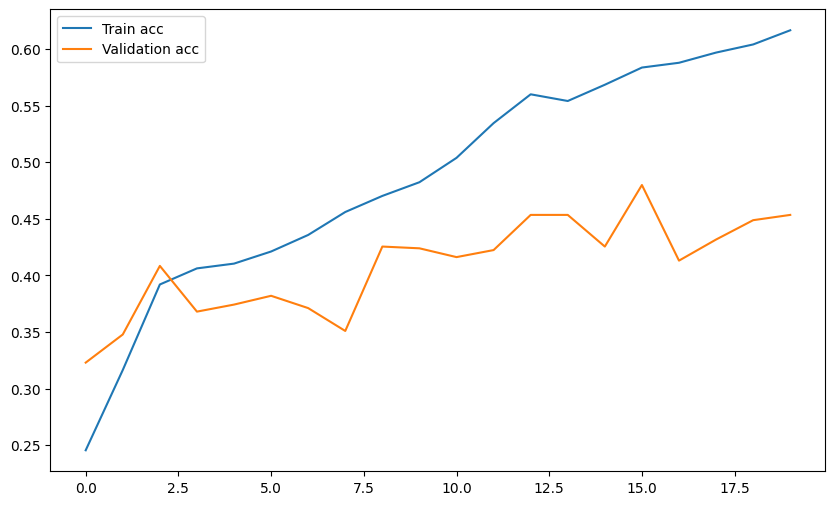

In [17]:
plt.figure(figsize=[10,6])
plt.plot(hist.history["accuracy"], label = "Train acc")
plt.plot(hist.history["val_accuracy"], label = "Validation acc")
plt.legend()
plt.show()

Gr√°fico de P√©rdida durante el Entrenamiento y Validaci√≥n del Modelo

Muestra la evoluci√≥n de la p√©rdida (loss) durante el proceso de entrenamiento y validaci√≥n de un modelo de aprendizaje autom√°tico. Utilizando el historial de p√©rdidas almacenado en hist.history, se trazan dos curvas: una para la p√©rdida en el conjunto de entrenamiento y otra para la p√©rdida en el conjunto de validaci√≥n. El gr√°fico permite visualizar c√≥mo var√≠an estos valores a lo largo de las √©pocas y es √∫til para diagnosticar posibles problemas de sobreajuste o subajuste en el modelo.

Curvas similares: indican buen ajuste o subajuste (dependiendo del valor de la p√©rdida).                             
Curvas separadas: indican posible sobreajuste (el modelo no generaliza bien).

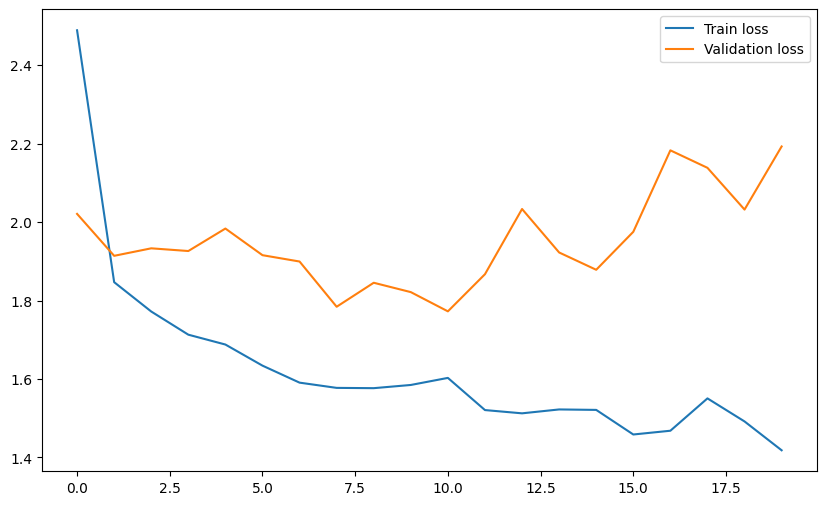

In [18]:
plt.figure(figsize=(10,6))
plt.plot(hist.history['loss'], label = "Train loss")
plt.plot(hist.history['val_loss'], label = "Validation loss")
plt.legend()
plt.show()

Visualizaci√≥n de Predicciones del Modelo en un Conjunto de Datos de Prueba

Evaluamos el rendimiento del modelo de aprendizaje autom√°tico al visualizar sus predicciones sobre un lote de im√°genes de prueba. Obtenemos un conjunto de im√°genes y sus etiquetas correspondientes del generador de datos de prueba. A continuaci√≥n, realizamos predicciones utilizando el modelo y se muestra un gr√°fico que presenta las im√°genes junto con sus predicciones y las etiquetas verdaderas. Cada imagen en el gr√°fico incluye un t√≠tulo que indica la clase predicha por el modelo y la clase real. Esta visualizaci√≥n es √∫til para diagnosticar el desempe√±o del modelo y observar ejemplos espec√≠ficos de aciertos y errores en la clasificaci√≥n.

2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 298ms/step


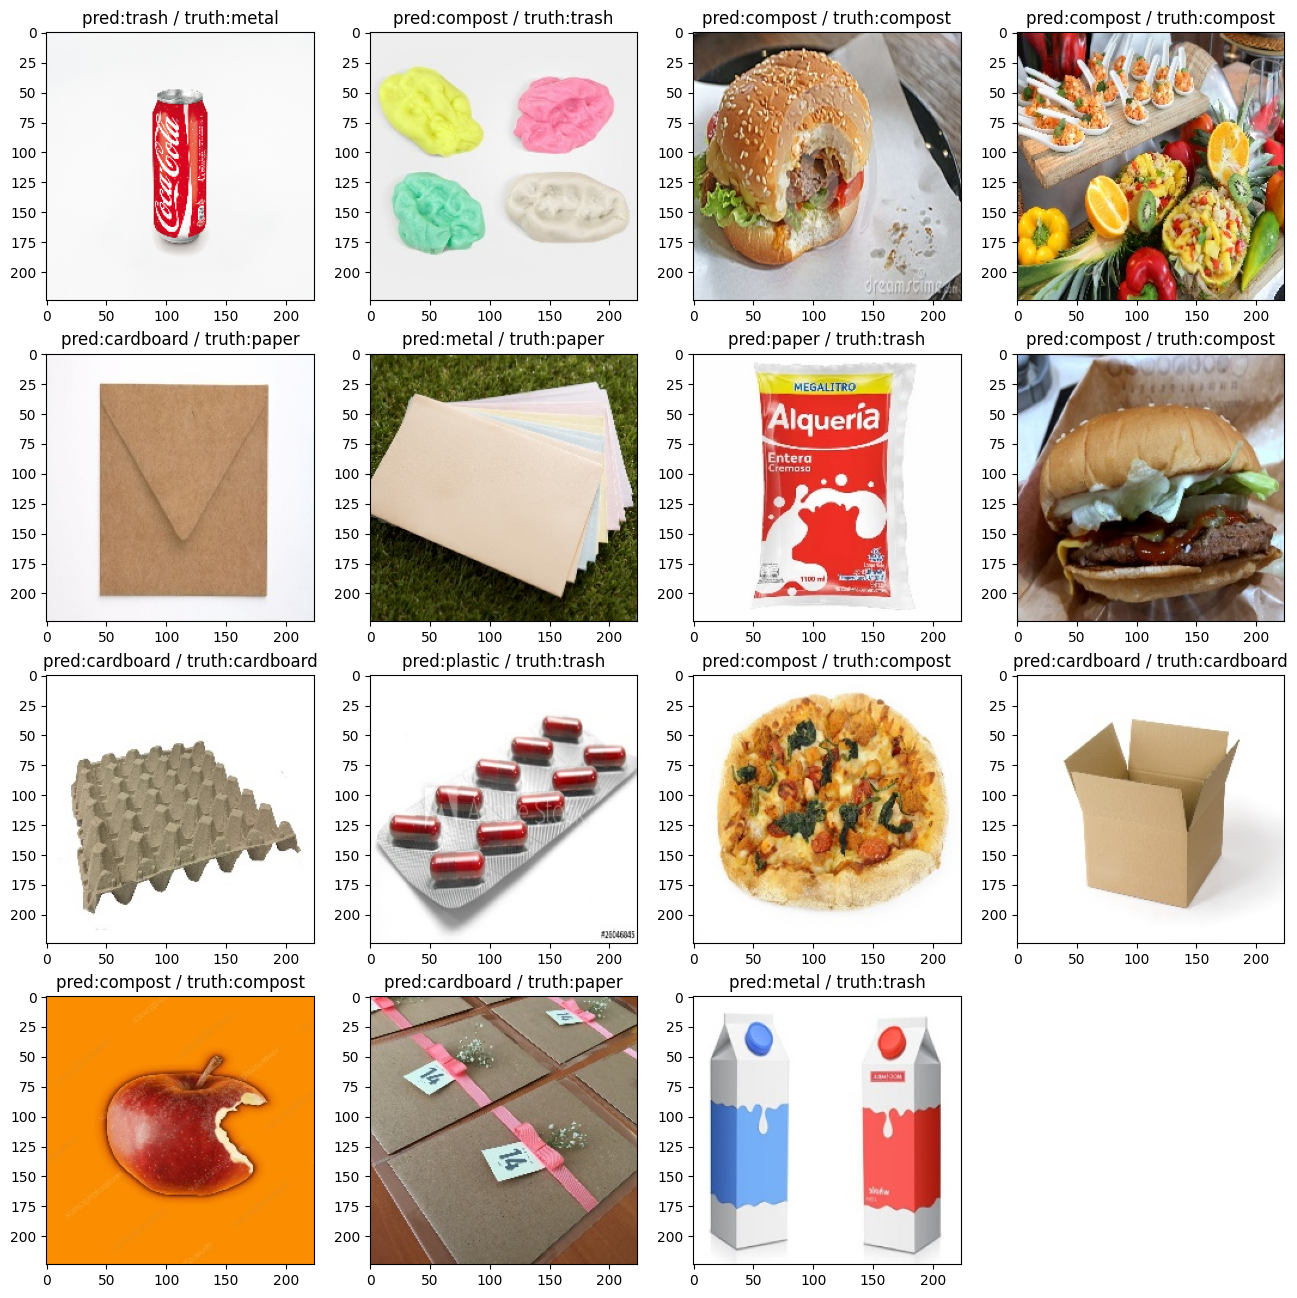

In [19]:
test_x, test_y = test_generator.__getitem__(1)

labels = (test_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())

preds = model.predict(test_x)

plt.figure(figsize=(16, 16))
for i in range(15):
    plt.subplot(4, 4, i+1)
    plt.title('pred:%s / truth:%s' % (labels[np.argmax(preds[i])], labels[np.argmax(test_y[i])]))
    plt.imshow(test_x[i])

# Guardamos el modelo üéì

In [20]:
model.save('/mnt/c/Users/edgardo/git-edgardo/Austral/TF-Diplo/Tensorflow/model_NoHayPlanetaB_tf.keras')